## This Google colab contains Implimentation of deep-Q learning for training of Cartpole game. During this process, we can see the clear effect of Q-Learning on the outcomes (reward).

In [ ]:
# Importing required libraries
%matplotlib inline
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Set parameters

In [ ]:
env = gym.make('CartPole-v1')                                                   # Importing the game

In [ ]:
state_size = env.observation_space.shape[0]                                     # Number of states
state_size

4

In [ ]:
action_size = env.action_space.n                                                # Number of actions            
action_size

2

In [ ]:
batch_size = 64                                                                 # Batch size

In [ ]:
n_episodes_train = 200                                                          # Number of episodes for training
n_episodes_test = 100                                                           # Number of episodes for testing

## Define Agent

In [ ]:
class Agent:
    def __init__(self, state_size, action_size):
        '''Agent class is a neural network model which takes intial inputs for number of states and actions of the environment, with which it is 
    interacting and while interacting with the environment it decides the action at each step by using exploration/exploitation optimal policy
    and it can learn by deep learning as well as by deep-Q learning.
    '''

        self.state_size = state_size
        self.action_size = action_size
        
        self.memory = deque(maxlen = 2000)                                      # For storing the results at each time step
        self.gamma = 0.95                                                       # Discount factor                 
        self.epsilon = 1.0                                                      # Initial exploration rate
        self.epsilon_decay = 0.985                                              # Decay rate to exploration rate
        self.epsilon_min = 0.01                                                 # Minimum value of exploration rate
        self.learning_rate = 0.001                                              # Learnng rate
        
        self.model = self._make_model()                                         # Buildning the model/Agent
        
        
    def _make_model(self):
        '''This function makes neural network model
        '''
        
        model = Sequential()
        model.add(Dense(24, input_dim = self.state_size, activation = "relu"))
        model.add(Dense(24, activation = "relu"))
        model.add(Dense(self.action_size, activation = "linear"))
        model.compile(loss = "mse", optimizer = Adam(learning_rate = self.learning_rate))
        
        return model
    
    
    
    def store(self, current_state, action, reward, next_state, done):
        '''This function stores the observations/results at each time step
        '''
             
        self.memory.append((current_state, action, reward, next_state, done))
        
        
        
    def take_action(self, state):
        '''This function decides action to be taken at each step by using exploration/exploitation optimum policy
        '''
        
        # Exploration 
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        # Exploitation
        else:
            action_values = self.model.predict(state)
        return np.argmax(action_values[0])
    
    
    def DQL(self, batch_size):
        '''This function updates the rewards for the future states and actions by using deep-Q learning 
        '''
        
        select_batch = random.sample(self.memory, batch_size)                   # Select the batch for updating Q-value
        
        for current_state, action, reward, next_state, done in select_batch:    # Looping over stored values for each selection
            target = reward

            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])  # Bellman eqtn. 
                
            target_q = self.model.predict(current_state)
            target_q[0][action] = target
            
            self.model.fit(current_state, target_q, epochs = 1, verbose = 0)    # Training the model with the updated Q-value for the current state
           
        if self.epsilon > self.epsilon_min:                                     # Epsilon decay step
            self.epsilon *= self.epsilon_decay
        
        return
        

    def without_DQL(self, batch_size):
        '''This function updates the rewards for the future states and actions without using deep-Q learning 
        '''
        
        select_batch = random.sample(self.memory, batch_size)                   # Select the batch for updating Q-value
        
        for current_state, action, reward, next_state, done in select_batch:    # Looping over stored values for each selection
            target = reward
                
            target_q = self.model.predict(current_state)
            target_q[0][action] = target
            
            self.model.fit(current_state, target_q, epochs = 1, verbose = 0)    # Training the model with the reward for the current state

           
        if self.epsilon > self.epsilon_min:                                     # Epsilon decay step
            self.epsilon *= self.epsilon_decay                  

In [ ]:
agent = Agent(state_size, action_size)

## Interact with the environment for training without DQL

In [ ]:
done = False
reward_list1 = []

for eps in range(n_episodes_train):

    total_reward = 0
    current_state = env.reset()                                         
    current_state = np.reshape(current_state, [1, state_size])
    
    for time_step in range(500):
        
        #env.render() 
        
        action = agent.take_action(current_state)                               # Choosing action for the current state
        next_state, reward, done, _ = env.step(action)                          # Getting observations/results for the action
        total_reward += reward                                                  # Summing the reward                                   
        next_state = np.reshape(next_state, [1, state_size])
        agent.store(current_state, action, reward, next_state, done)            # Storing the observations
        current_state = next_state                                              # Updating the state
        
        if done:
          
            print("Episode: {}/{}, reward: {}, eps: {:.2}".format(eps+1, n_episodes_train, total_reward, agent.epsilon))
            break

    reward_list1.append(total_reward)
    if len(agent.memory) > batch_size:                                          # without DQ Learning 
        agent.without_DQL(batch_size)

Episode: 1/200, reward: 37.0, eps: 1.0
Episode: 2/200, reward: 13.0, eps: 1.0
Episode: 3/200, reward: 24.0, eps: 1.0
Episode: 4/200, reward: 19.0, eps: 0.98
Episode: 5/200, reward: 27.0, eps: 0.97
Episode: 6/200, reward: 8.0, eps: 0.96
Episode: 7/200, reward: 27.0, eps: 0.94
Episode: 8/200, reward: 12.0, eps: 0.93
Episode: 9/200, reward: 17.0, eps: 0.91
Episode: 10/200, reward: 11.0, eps: 0.9
Episode: 11/200, reward: 29.0, eps: 0.89
Episode: 12/200, reward: 12.0, eps: 0.87
Episode: 13/200, reward: 24.0, eps: 0.86
Episode: 14/200, reward: 16.0, eps: 0.85
Episode: 15/200, reward: 26.0, eps: 0.83
Episode: 16/200, reward: 32.0, eps: 0.82
Episode: 17/200, reward: 10.0, eps: 0.81
Episode: 18/200, reward: 24.0, eps: 0.8
Episode: 19/200, reward: 21.0, eps: 0.79
Episode: 20/200, reward: 18.0, eps: 0.77
Episode: 21/200, reward: 15.0, eps: 0.76
Episode: 22/200, reward: 26.0, eps: 0.75
Episode: 23/200, reward: 43.0, eps: 0.74
Episode: 24/200, reward: 17.0, eps: 0.73
Episode: 25/200, reward: 9.0, e

# Interact with the environment for training with DQL

In [ ]:
done = False
reward_list2 = []

for eps in range(n_episodes_train):
    total_reward = 0
    current_state = env.reset()                                         
    current_state = np.reshape(current_state, [1, state_size])
    
    for time_step in range(500):
        
        #env.render()
        
        action = agent.take_action(current_state)                               # Choosing action for the current state
        next_state, reward, done, _ = env.step(action)                          # Getting observations/results for the action
        total_reward += reward                                                  # Summing the reward
                                            
        next_state = np.reshape(next_state, [1, state_size])
        agent.store(current_state, action, reward, next_state, done)            # Storing the observations
        current_state = next_state                                              # Updating the state
        
        if done:
          
            print("Episode: {}/{}, reward: {}, eps: {:.2}".format(eps+1, n_episodes_train, total_reward, agent.epsilon))
            break
    reward_list2.append(total_reward)
    if len(agent.memory) > batch_size:                                          # DQ Learning 
        agent.DQL(batch_size)

Episode: 1/200, reward: 26.0, eps: 1.0
Episode: 2/200, reward: 16.0, eps: 1.0
Episode: 3/200, reward: 11.0, eps: 1.0
Episode: 4/200, reward: 28.0, eps: 1.0
Episode: 5/200, reward: 21.0, eps: 0.98
Episode: 6/200, reward: 14.0, eps: 0.97
Episode: 7/200, reward: 29.0, eps: 0.96
Episode: 8/200, reward: 16.0, eps: 0.94
Episode: 9/200, reward: 19.0, eps: 0.93
Episode: 10/200, reward: 14.0, eps: 0.91
Episode: 11/200, reward: 12.0, eps: 0.9
Episode: 12/200, reward: 24.0, eps: 0.89
Episode: 13/200, reward: 23.0, eps: 0.87
Episode: 14/200, reward: 10.0, eps: 0.86
Episode: 15/200, reward: 17.0, eps: 0.85
Episode: 16/200, reward: 19.0, eps: 0.83
Episode: 17/200, reward: 13.0, eps: 0.82
Episode: 18/200, reward: 8.0, eps: 0.81
Episode: 19/200, reward: 11.0, eps: 0.8
Episode: 20/200, reward: 14.0, eps: 0.79
Episode: 21/200, reward: 20.0, eps: 0.77
Episode: 22/200, reward: 17.0, eps: 0.76
Episode: 23/200, reward: 12.0, eps: 0.75
Episode: 24/200, reward: 14.0, eps: 0.74
Episode: 25/200, reward: 11.0, e

# Printing mean reward and plotting rewards vs episodes for training without DQL

Mean reward for 200 episodes:  22.65


Text(0.5, 1.0, 'Reward for training without DQL with initial eps=1.0, eps_decay=0.985')

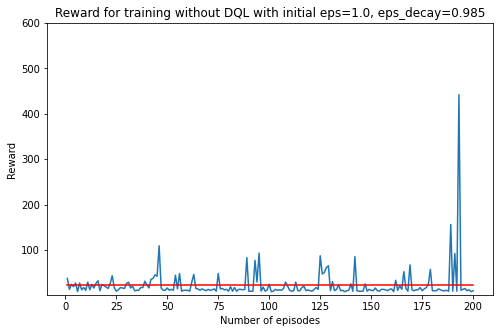

In [ ]:
print("Mean reward for {} episodes: ".format(n_episodes_train), np.mean(reward_list1))

plt.figure(figsize = (8, 5))
plt.plot(range(1, n_episodes_train+1), reward_list1)
x = range(1, n_episodes_train+1)
y = len(x) * [np.mean(reward_list1)]
plt.plot(x, y, color = "red")
plt.ylim(1, 600)
plt.xlabel("Number of episodes")
plt.ylabel("Reward")
plt.title("Reward for training without DQL with initial eps=1.0, eps_decay=0.985")

# Printing mean reward and plotting rewards vs episodes for training with DQL

Mean reward for 200 episodes:  92.515


Text(0.5, 1.0, 'Reward for training with DQL with initial eps=1.0, eps_decay=0.985')

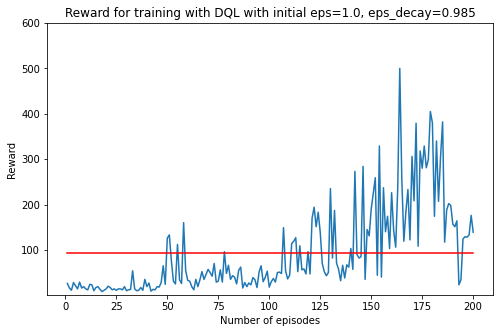

In [ ]:
print("Mean reward for {} episodes: ".format(n_episodes_train), np.mean(reward_list2))

plt.figure(figsize = (8, 5))
plt.plot(range(1, n_episodes_train+1), reward_list2)
x = range(1, n_episodes_train+1)
y = len(x) * [np.mean(reward_list2)]
plt.plot(x, y, color = "red")
plt.ylim(1, 600)
plt.xlabel("Number of episodes")
plt.ylabel("Reward")
plt.title("Reward for training with DQL with initial eps=1.0, eps_decay=0.985")

# Testing

In [ ]:
done = False
reward_list_test = []
agent.epsilon = 0.0

for eps in range(n_episodes_test):
    total_reward = 0
    current_state = env.reset()                                         
    current_state = np.reshape(current_state, [1, state_size])
    
    for time_step in range(500):
        
        #env.render()
        
        action = agent.take_action(current_state)                               # Choosing action for the current state
        next_state, reward, done, _ = env.step(action)                          # Getting observations/results for the action
        total_reward += reward                                                  # Summing the rewards
                                            
        next_state = np.reshape(next_state, [1, state_size])
        current_state = next_state                                              # Updating the state
        
        if done:
          
            print("Episode: {}/{}, reward: {}, eps: {:.2}".format(eps+1, n_episodes_test, total_reward, agent.epsilon))
            break
    reward_list_test.append(total_reward)
    

Episode: 1/100, reward: 10.0, eps: 0.0
Episode: 2/100, reward: 8.0, eps: 0.0
Episode: 3/100, reward: 10.0, eps: 0.0
Episode: 4/100, reward: 8.0, eps: 0.0
Episode: 5/100, reward: 11.0, eps: 0.0
Episode: 6/100, reward: 10.0, eps: 0.0
Episode: 7/100, reward: 11.0, eps: 0.0
Episode: 8/100, reward: 9.0, eps: 0.0
Episode: 9/100, reward: 10.0, eps: 0.0
Episode: 10/100, reward: 9.0, eps: 0.0
Episode: 11/100, reward: 9.0, eps: 0.0
Episode: 12/100, reward: 9.0, eps: 0.0
Episode: 13/100, reward: 10.0, eps: 0.0
Episode: 14/100, reward: 9.0, eps: 0.0
Episode: 15/100, reward: 10.0, eps: 0.0
Episode: 16/100, reward: 8.0, eps: 0.0
Episode: 17/100, reward: 9.0, eps: 0.0
Episode: 18/100, reward: 10.0, eps: 0.0
Episode: 19/100, reward: 10.0, eps: 0.0
Episode: 20/100, reward: 8.0, eps: 0.0
Episode: 21/100, reward: 9.0, eps: 0.0
Episode: 22/100, reward: 9.0, eps: 0.0
Episode: 23/100, reward: 10.0, eps: 0.0
Episode: 24/100, reward: 8.0, eps: 0.0
Episode: 25/100, reward: 8.0, eps: 0.0
Episode: 26/100, reward

# Plotting the performance of the agent training without DQL 

Mean reward for 100 episodes:  9.4


Text(0.5, 1.0, 'Testing Reward for the agent without DQ with initial eps=1.0, eps_decay=0.985')

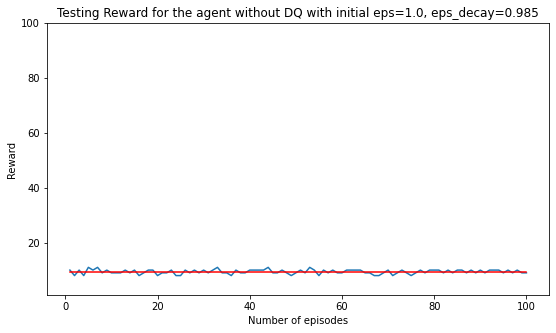

In [ ]:
print("Mean reward for {} episodes: ".format(n_episodes_test), np.mean(reward_list_test))

plt.figure(figsize = (9, 5))
plt.plot(range(1, n_episodes_test+1), reward_list_test)
x = range(1, n_episodes_test+1)
y = len(x) * [np.mean(reward_list_test)]
plt.plot(x, y, color = "red")
plt.ylim(1, 100)
plt.xlabel("Number of episodes")
plt.ylabel("Reward")
plt.title("Testing Reward for the agent without DQ with initial eps=1.0, eps_decay=0.985")

# Plotting the performance of the agent training with DQL

Mean reward for 100 episodes:  165.78


Text(0.5, 1.0, 'Testing Reward for the agent with DQ with initial eps=1.0, eps_decay=0.985')

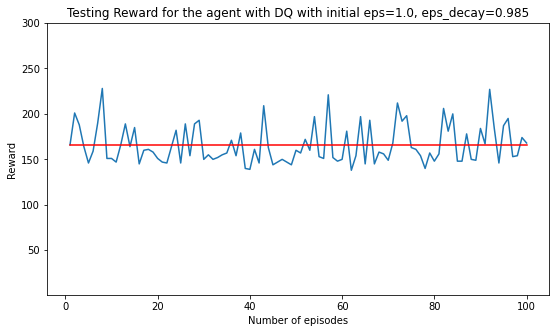

In [ ]:
print("Mean reward for {} episodes: ".format(n_episodes_test), np.mean(reward_list_test))

plt.figure(figsize = (9, 5))
plt.plot(range(1, n_episodes_test+1), reward_list_test)
x = range(1, n_episodes_test+1)
y = len(x) * [np.mean(reward_list_test)]
plt.plot(x, y, color = "red")
plt.ylim(1, 300)
plt.xlabel("Number of episodes")
plt.ylabel("Reward")
plt.title("Testing Reward for the agent with DQ with initial eps=1.0, eps_decay=0.985")